# Predicting Mass Invariant of electron pairs

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from tensorflow.keras import models, layers


def RMSE(mse):
    RMSE = np.square(mse)
    return RMSE

## Data

In [2]:
df = pd.read_csv('CODE/CERN/data/input/cern-electron-collision-data/dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [4]:
df_to_predict =df[ df.M.isnull()]

## Visualization

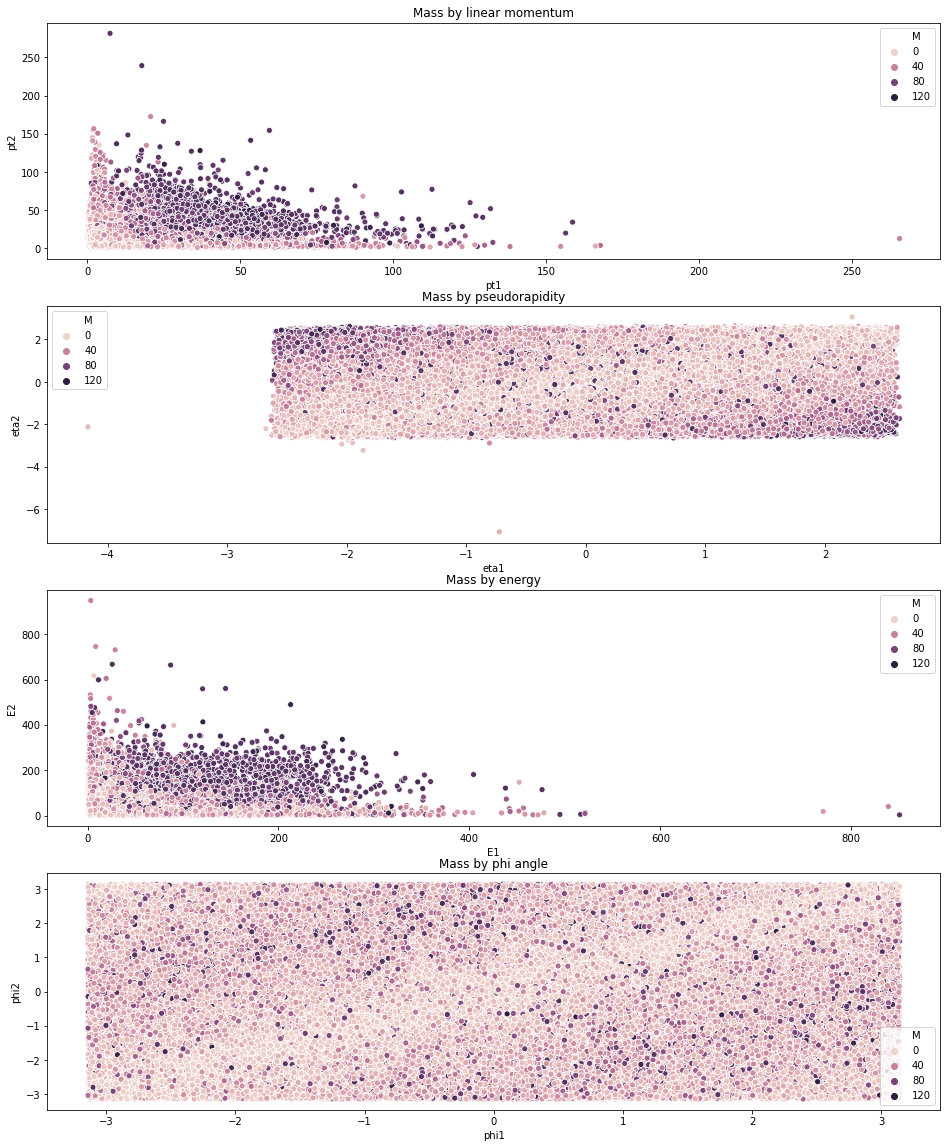

In [5]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,20))

sns.scatterplot(ax= ax[0],data=df, x='pt1', y='pt2', hue='M', hue_norm=(df.M.min(),df.M.max()))
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=df, x='eta1', y='eta2', hue='M', hue_norm=(df.M.min(),df.M.max()))
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=df, x='E1', y='E2', hue='M', hue_norm=(df.M.min(),df.M.max()))
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=df, x='phi1', y='phi2', hue='M', hue_norm=(df.M.min(),df.M.max()))
ax[3].set_title('Mass by phi angle')

plt.show()

### Correlation

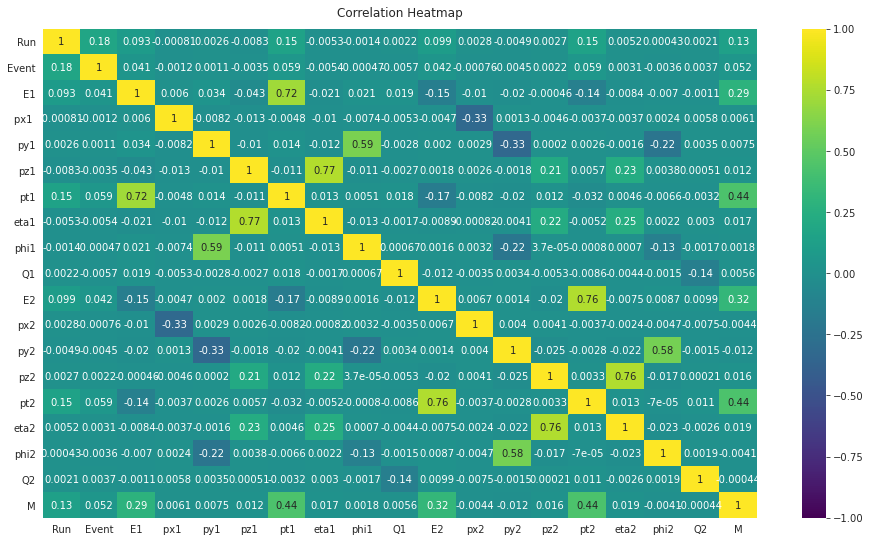

In [6]:
sns.set_style(style='dark')
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True,cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

Great correlation between Mass invariant (M) and:
* Energies: [E1,E2]
* Linear momentums: [pt1,pt2]

## Model prediction

### Data selection

In [7]:
df_traintest = df.drop(index=df_to_predict.index)

y = df_traintest.M
X = df_traintest.drop(columns=['M','Run','Event'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_topred = df_to_predict.drop(columns=['M','Run','Event'])

### Random Forest Regressor

In [8]:
RFR = RandomForestRegressor(n_jobs=3, random_state=42)

RFR.fit(X_train,y_train)
Y_pred = RFR.predict(X_test)

RMSE_RFR = RMSE(mean_squared_error(y_test,Y_pred))

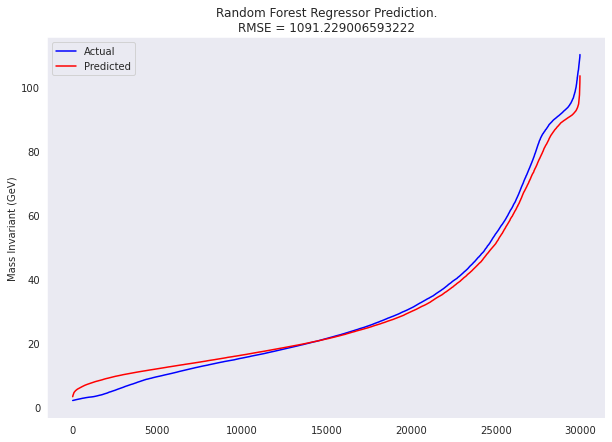

In [9]:
fig = plt.figure(figsize=(10,7))

plt.plot(np.arange(0,len(y_test)),sorted(y_test), c='b', label='Actual')
plt.plot(np.arange(0,len(y_test)),sorted(Y_pred), c='r', label='Predicted')

plt.title('Random Forest Regressor Prediction.\nRMSE = {}'.format(RMSE_RFR))
plt.ylabel('Mass Invariant (GeV)')
plt.legend(loc='best')

plt.show()

### Gradient Boosting Regressor


In [10]:
GBR = GradientBoostingRegressor(random_state=42)

GBR.fit(X_train,y_train)
Y_pred = GBR.predict(X_test)

RMSE_GBR = RMSE(mean_squared_error(y_test,Y_pred))

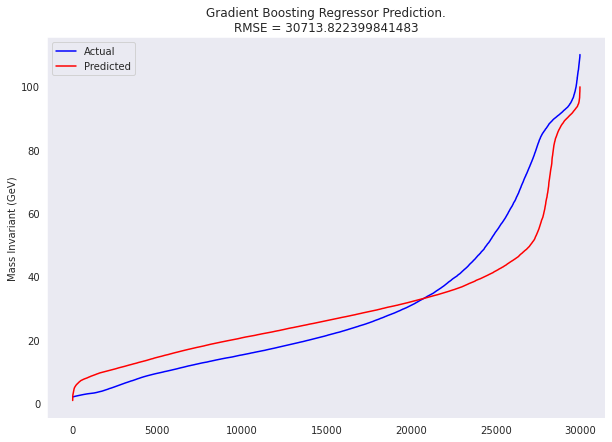

In [11]:
fig = plt.figure(figsize=(10,7))

plt.plot(np.arange(0,len(y_test)),sorted(y_test), c='b', label='Actual')
plt.plot(np.arange(0,len(y_test)),sorted(Y_pred), c='r', label='Predicted')

plt.title('Gradient Boosting Regressor Prediction.\nRMSE = {}'.format(RMSE_GBR))
plt.ylabel('Mass Invariant (GeV)')
plt.legend(loc='best')

plt.show()

### Neural Network Regressor

In [12]:
NNR = models.Sequential()

NNR.add(layers.Dense(20, activation='sigmoid', input_shape=(X.shape[1],)))
NNR.add(layers.Dense(4, activation='sigmoid'))
NNR.add(layers.Dense(1, activation='relu'))

NNR.compile(loss='mse',
           optimizer='adam',
           metrics=['mse'])

NNR.fit(X_train,y_train,
       batch_size=500,
       epochs = 500,
       validation_data=(X_test,y_test))

Epoch 1/500
140/140 [==============================] - 0s 3ms/step - loss: 1496.6000 - mse: 1496.6000 - val_loss: 1467.0984 - val_mse: 1467.0984
Epoch 2/500
140/140 [==============================] - 0s 2ms/step - loss: 1440.0829 - mse: 1440.0829 - val_loss: 1430.9421 - val_mse: 1430.9421
Epoch 3/500
140/140 [==============================] - 0s 2ms/step - loss: 1409.9861 - mse: 1409.9861 - val_loss: 1404.1510 - val_mse: 1404.1510
Epoch 4/500
140/140 [==============================] - 0s 2ms/step - loss: 1384.7186 - mse: 1384.7186 - val_loss: 1379.8169 - val_mse: 1379.8169
Epoch 5/500
140/140 [==============================] - 0s 2ms/step - loss: 1361.1053 - mse: 1361.1053 - val_loss: 1356.6322 - val_mse: 1356.6322
Epoch 6/500
140/140 [==============================] - 0s 2ms/step - loss: 1338.4548 - mse: 1338.4548 - val_loss: 1334.2837 - val_mse: 1334.2837
Epoch 7/500
140/140 [==============================] - 0s 2ms/step - loss: 1316.5646 - mse: 1316.5646 - val_loss: 1312.6267 - val_

In [13]:
Y_pred_NNR = NNR.predict(X_test)

RMSE_NNR = RMSE(mean_squared_error(y_test,Y_pred_NNR))

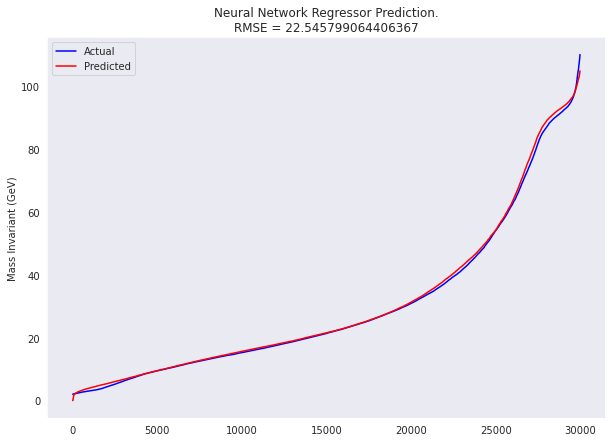

In [14]:
fig = plt.figure(figsize=(10,7))

plt.plot(np.arange(0,len(y_test)),sorted(y_test), c='b', label='Actual')
plt.plot(np.arange(0,len(y_test)),sorted(Y_pred_NNR), c='r', label='Predicted')

plt.title('Neural Network Regressor Prediction.\nRMSE = {}'.format(RMSE_NNR))
plt.ylabel('Mass Invariant (GeV)')
plt.legend(loc='best')

plt.show()

## Prediction of Nan values 

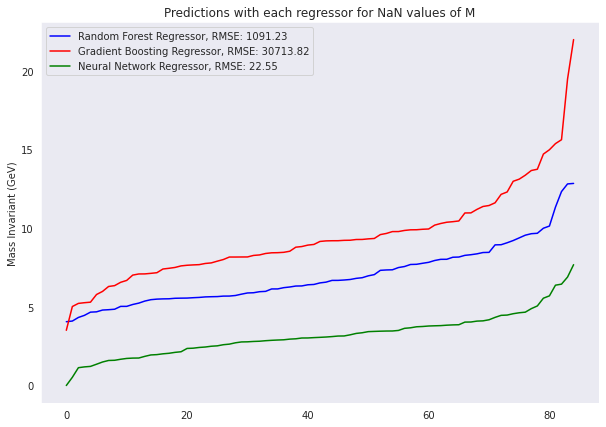

In [15]:
Y_nan_RFR = RFR.predict(X_topred)
Y_nan_GBR = GBR.predict(X_topred)
Y_nan_NNR = NNR.predict(X_topred)

fig = plt.figure(figsize=(10,7))

plt.plot(np.arange(0,len(X_topred)),sorted(Y_nan_RFR), c='b', label='Random Forest Regressor, RMSE: {:.2f}'.format(RMSE_RFR))
plt.plot(np.arange(0,len(X_topred)),sorted(Y_nan_GBR), c='r', label='Gradient Boosting Regressor, RMSE: {:.2f}'.format(RMSE_GBR))
plt.plot(np.arange(0,len(X_topred)),sorted(Y_nan_NNR), c='g', label='Neural Network Regressor, RMSE: {:.2f}'.format(RMSE_NNR))

plt.title('Predictions with each regressor for NaN values of M')
plt.ylabel('Mass Invariant (GeV)')
plt.legend(loc='best')

plt.show()

In [16]:
df_pred = pd.DataFrame(np.array([Y_nan_RFR,Y_nan_GBR,Y_nan_NNR.ravel()]).T,
                      columns = ['M_RFR','M_GBR','M_NNR'],index=X_topred.index)

df_nan = df_to_predict.drop(columns='M')
df_nan = pd.concat([df_nan,df_pred], axis=1)

In [17]:
df_nan

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,px2,py2,pz2,pt2,eta2,phi2,Q2,M_RFR,M_GBR,M_NNR
2354,147115,626787667,2.552450,0.783675,-2.42902,-0.026877,2.552310,-0.010530,-1.25871,1,...,4.387350,-13.58510,-0.142737,14.27600,-0.009998,-1.258420,-1,5.545173,7.644445,2.521362
4428,147115,222901013,2.537850,-1.024290,-1.94845,-1.262950,2.201280,-0.546171,-2.05479,1,...,-8.881480,-16.89470,-10.945300,19.08690,-0.545920,-2.054790,-1,6.522037,9.193521,2.145868
5035,147115,251148678,2.914610,1.578570,2.33753,0.734179,2.820620,0.257437,0.97683,-1,...,8.977390,13.30470,4.178960,16.05020,0.257513,0.977215,1,5.806568,8.268988,3.795824
6066,146644,908463569,19.896200,-11.256100,12.47620,-10.653800,16.803400,-0.597779,2.30483,-1,...,-1.366660,1.51671,-1.293790,2.04161,-0.597517,2.304200,1,5.367847,7.090838,2.495773
6667,146644,588243059,3.610600,-1.635780,-2.64885,-1.828730,3.113230,-0.557996,-2.12402,1,...,-11.836800,-19.16480,-13.214400,22.52550,-0.557335,-2.124080,-1,7.830971,12.983246,3.733406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95396,149182,227768088,0.994475,0.358496,-0.56898,-0.732614,0.672501,-0.943190,-1.00856,1,...,13.518500,-21.38920,-27.587500,25.30310,-0.943794,-1.007160,-1,9.998212,10.195884,3.668928
96087,149182,233450553,4.573870,-3.415140,2.97767,0.624910,4.530980,0.137486,2.42452,1,...,-13.515300,11.77250,2.478260,17.92370,0.137831,2.425000,-1,5.491374,10.973885,4.478043
96394,149182,99636450,12.192400,0.074398,-11.73300,3.314690,11.733200,0.278877,-1.56446,-1,...,0.038936,-5.78425,1.632860,5.78438,0.278666,-1.564060,1,6.681962,9.204822,2.777079
97996,146511,240272111,5.165580,-4.391900,-1.96237,1.882430,4.810370,0.381970,-2.72139,-1,...,-11.669700,-5.21431,5.001750,12.78160,0.381967,-2.721380,1,5.237322,9.784652,3.751787
